<a href="https://colab.research.google.com/github/JoudySaleh-IT/IT326/blob/main/Phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Read dataset:**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectKBest, f_classif
import pickle
import jinja2

df = pd.read_csv('heart.csv')


Attributes’ description table:

In [ ]:

data = {
    "Attribute Name": [
        "age", "sex", "cp", "trestbps", "chol","fbs", "restecg", "thalach",
        "exang", "oldpeak", "slope", "ca", "thal","target"
    ],
    "Description": [
        "age in years", "Gender of the patient", "chest pain type", "resting blood pressure (in mm Hg on admission to the hospital)",
        "serum cholestoral in mg/dl",
        "fasting blood sugar > 120 mg/dl",
        "resting electrocardiographic results",
        "maximum heart rate achieved",
        "exercise induced angina",
        "ST depression induced by exercise relative to rest",
        "the slope of the peak exercise ST segment",
        "number of major vessels (0-3) colored by fluoroscopy",
        "1 = normal; 2 = fixed defect; 3 = reversible defect",
        "The class label, refers to the presence of heart disease in the patient"
    ],
    "Data Type": [
       "Numeric", "Binary", "Ordinal", "Numeric","Numeric", "Binary","Nominal", "Numeric", "Binary",
        "Numeric", "Ordinal", "Ordinal", "Nominal", "Binary"
    ],
    "Possible Values": [
        "Range between 29-77","Female, Male","Range between 0-3","Range between 94-200","Range between 126-564",
        "1 = greater than 120 mg/dl, 0 = less than 120 mg/dl",
        "Range between 0-2","Range between 71-202","1 = exercise induced angina, 0 = no",
        "Range between 0-6.2","Range between 0-2","Range between 0-4",
        "Range between 0-3","1 = have heart disease, 0 = no heart disease"
    ]
}


attributes_df = pd.DataFrame(data)


from IPython.core.display import display


display(attributes_df)

,Attribute Name,Description,Data Type,Possible Values
0,age,age in years,Numeric,Range between 29-77
1,sex,Gender of the patient,Binary,"Female, Male"
2,cp,chest pain type,Ordinal,Range between 0-3
3,trestbps,resting blood pressure (in mm Hg on admission ...,Numeric,Range between 94-200
4,chol,serum cholestoral in mg/dl,Numeric,Range between 126-564
5,fbs,fasting blood sugar > 120 mg/dl,Binary,"1 = greater than 120 mg/dl, 0 = less than 120 ..."
6,restecg,resting electrocardiographic results,Nominal,Range between 0-2
7,thalach,maximum heart rate achieved,Numeric,Range between 71-202
8,exang,exercise induced angina,Binary,"1 = exercise induced angina, 0 = no"
9,oldpeak,ST depression induced by exercise relative to ...,Numeric,Range between 0-6.2


**Sample of 20 people from the dataset:**

In [ ]:
sample=df.sample(n=20);
sample

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
955,62,1,2,130,231,0,1,146,0,1.8,1,3,3,1
140,57,1,0,152,274,0,1,88,1,1.2,1,1,3,0
997,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0
190,41,1,2,112,250,0,1,179,0,0.0,2,0,2,1
773,65,0,0,150,225,0,0,114,0,1.0,1,3,3,0
139,41,1,1,110,235,0,1,153,0,0.0,2,0,2,1
868,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
163,48,1,0,124,274,0,0,166,0,0.5,1,0,3,0
164,56,1,0,125,249,1,0,144,1,1.2,1,1,2,0
249,42,1,2,130,180,0,1,150,0,0.0,2,0,2,1


Summary of data:

In [ ]:
summary=df.describe();
print(summary);

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

description:

Age:
There is significant variability in ages, ranging from 29 to 77 years, with an average of 54.43 years. This indicates that the dataset primarily consists of middle-aged and older individuals, who are at a higher risk of heart disease.

Sex:
The values are binary (0 for female, 1 for male), with a mean of 0.695, indicating that about 70% of the dataset consists of males. This suggests a higher representation of males in the study, which is relevant as men often have different heart disease risk factors compared to women.

Chest Pain Type (CP):
The values range from 0 to 3, with an average of 0.94. This suggests that most individuals experience mild to moderate chest pain, which is a key symptom of heart disease. The standard deviation is 1.03, indicating variation in pain levels across individuals.

Resting Blood Pressure (Trestbps):
The values range from 94 to 200 mmHg, with the mean at 131.61 mmHg. The median is 130 mmHg, which is close to the mean, suggesting a relatively balanced distribution. The standard deviation is 17.51, indicating moderate variability in blood pressure levels among individuals.

serum cholestoral (Chol):
The values vary significantly, with a minimum of 126 and a maximum of 564. The mean is 246, which is slightly higher than the median of 240, indicating a slight skew in distribution. The standard deviation is 51.59, suggesting considerable variability in cholesterol levels, which may indicate different risk profiles for heart disease.

Fasting Blood Sugar (FBS):
The values are binary, limited to 0 and 1, with a mean of 0.149, indicating that around 15% of individuals have fasting blood sugar ≥ 120 mg/dl. This suggests that diabetes is present but not very common in this dataset.

Resting ECG (Restecg):
The values range from 0 to 2, with a mean of 0.53, indicating that about 53% of individuals have some form of abnormal resting ECG results. This suggests that a significant portion of individuals show heart abnormalities even at rest.

Maximum Heart Rate Achieved (Thalach):
Heart rate values range from 71 bpm to 202 bpm, which indicates a wide range of cardiovascular fitness levels. The mean is 149 bpm, which is relatively high. The median of 152 bpm is very close to the mean, suggesting that the heart rate distribution is fairly symmetrical. The standard deviation is 23.00, showing variability in heart rates among individuals.

Exercise-Induced Angina (Exang):
The values are binary, limited to 0 and 1, with a mean of 0.336, indicating that about 33% of individuals experience angina during exercise. This suggests that a significant portion of individuals show signs of heart-related issues when performing physical activity.

ST depression induced by exercise relative to rest(Oldpeak):
ST depression values range from 0 to 6.2, with a mean of 1.07. The median of 0.8 suggests that most individuals have mild ST depression, but a few cases show severe depression, which is a potential indicator of heart disease risk. The standard deviation is 1.17, showing that there is variability in how much ST depression different individuals experience.

Slope of the Peak Exercise ST Segment (Slope):
The values range from 0 to 2, with a mean of 1.38. This suggests that most individuals have a moderate or normal response to exercise, but some have abnormal slopes, which could indicate ischemia (reduced blood flow to the heart).

Number of Major Vessels Colored by Fluoroscopy (CA):
The values range from 0 to 4, with a mean of 0.75. This suggests that most individuals have fewer major blood vessel blockages, but some have severe obstructions, indicating a risk of cardiovascular issues.

Thalassemia (Thal):
The values range from 0 to 3, with an average of 2.32. This suggests that most individuals have normal or slightly abnormal thalassemia test results.

Heart Disease (Target):
The values are binary, limited to 0 and 1, with a mean of 0.513 and a standard deviation of 0.50. This suggests significant variability in heart disease presence, with a fairly even distribution between those with and without heart disease.

Calculate the variance :


In [ ]:
variance= df.var(numeric_only=True);
print(variance)

age           82.306450
sex            0.211944
cp             1.060160
trestbps     306.835410
chol        2661.787109
fbs            0.127111
restecg        0.278655
thalach      529.263325
exang          0.223514
oldpeak        1.380750
slope          0.381622
ca             1.062544
thal           0.385219
target         0.250071
dtype: float64


Variance Analysis of the Dataset:

High Variance Values:
Cholesterol (2661.79) → Extremely high, meaning large differences in cholesterol levels.

Resting Blood Pressure (306.84) → High variance, suggesting a wide range of BP values.

Maximum Heart Rate Achieved (529.26) → Indicates significant variability in heart rate.

Age (82.31) → Shows a diverse age distribution.


Moderate Variance Values:
Chest Pain Type (1.06).

Number of Major Vessels (1.06).

ST Depression (1.38).

These values suggest some variation but not as extreme as cholesterol or heart rate.


Low Variance Values:
Binary columns like Sex (0.21), FBS (0.12), Exang (0.22), and Target (0.25) → Limited variation because they mostly contain 0s and 1s.
Thal (0.38) and Slope (0.38) → Relatively small spread.

**Understanding the data through graph representations:**


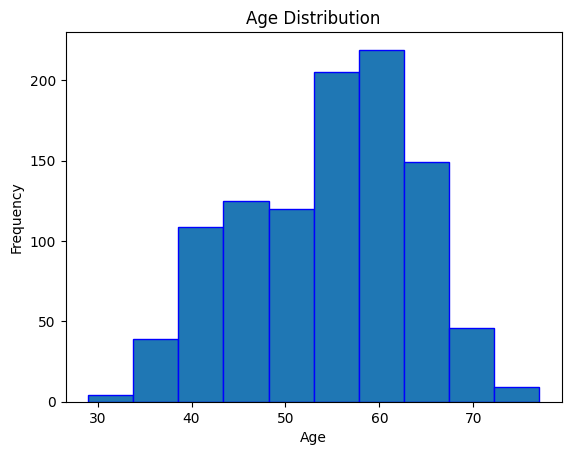

In [ ]:
ages = df['age']
plt.hist(ages , bins = 10, edgecolor = 'blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show;

The histogram illustrates the age distribution of participants in our dataset. Key observations include:

Majority Age Group: Most individuals are aged between 50 and 60 years, indicating a focus on middle-aged adults.

Range: The ages range from approximately 30 to over 70, showing a diverse study population.

**Data Preprocessing:**

**Show Duplicate:**

To make sure that our data is clean and doesn't contain redundant data we start by using the code that help us to find the duplication.

In [ ]:
num_duplicates = df.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 723


**Removing Duplicate:**

In [ ]:
# Removing duplicate rows
df_clean = df.drop_duplicates()

# Print the shape of the DataFrame before and after removing duplicates to verify
print("Original DataFrame shape:", df.shape)
print("New DataFrame shape after removing duplicates:", df_clean.shape)


Original DataFrame shape: (1025, 14)
New DataFrame shape after removing duplicates: (302, 14)


we employed the drop_duplicates() method to eliminate these redundancies. This method scans the dataset for rows with identical information across all columns and removes all but the first occurrence of each duplicate row.

After removing the duplicated data the sum of the duplicated objects is 0, so we made sure that our objects are distinct.

**Show missing data:**

In [ ]:
missing_counts = df.isnull().sum()
print("Missing values in each column:")
print(missing_counts)
print()
rows_with_missing = df.isnull().sum(axis=1)
print("Rows with missing values:")
print(rows_with_missing);

Missing values in each column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Rows with missing values:
0       0
1       0
2       0
3       0
4       0
       ..
1020    0
1021    0
1022    0
1023    0
1024    0
Length: 1025, dtype: int64


We notice that there are no missing values, and all columns are complete.

**Show Outliers:**

Outliers are detected to identify data points that deviate significantly from the bulk of the data, as these can skew our analyses or predictive models. By removing such outliers, we aim to prevent them from influencing the overall analysis and ensure that our models perform optimally without being biased by these anomalies.

In [ ]:

# Columns selected for detecting outliers based on their clinical significance and potential for abnormal values
columns_to_detect_outliers = ['age', 'trestbps', 'chol', 'thalach']
# Calculate z-scores for the selected columns
z_scores = df[columns_to_detect_outliers].apply(zscore)

# Define a threshold for identifying outliers
threshold = 2

# Identify outliers using the threshold
outliers = df[(abs(z_scores) > threshold).any(axis=1)]

# Display the outliers
print("Outliers based on z-scores for the selected columns: \n")
display(outliers)


Outliers based on z-scores for the selected columns: 



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
12,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
29,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0
32,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
40,65,0,2,160,360,0,0,151,0,0.8,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
986,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0
996,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
1014,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1


**Removing outliers:**

In [ ]:
#Remove the rows with outliers
df_no_outlier= df.drop(outliers.index)

#count the removed rows
df_no_outlierRows=df_no_outlier.shape[0]

print("After removing outliers from the selected columns \n ")

display(df_no_outlier)

print("\nnumber of rows after remove outliers: \n"+ str(df_no_outlierRows) +"\n")

After removing outliers from the selected columns 
 


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1



number of rows after remove outliers: 
868



**Correlation Coefficient:**


Correlation coefficient between age and chol: 0.22
Correlation coefficient between age and trestbps: 0.27
Correlation coefficient between age and thalach: -0.39
Correlation coefficient between age and oldpeak: 0.21
Correlation coefficient between chol and trestbps: 0.13
Correlation coefficient between chol and thalach: -0.02
Correlation coefficient between chol and oldpeak: 0.06
Correlation coefficient between trestbps and thalach: -0.04
Correlation coefficient between trestbps and oldpeak: 0.19
Correlation coefficient between thalach and oldpeak: -0.35


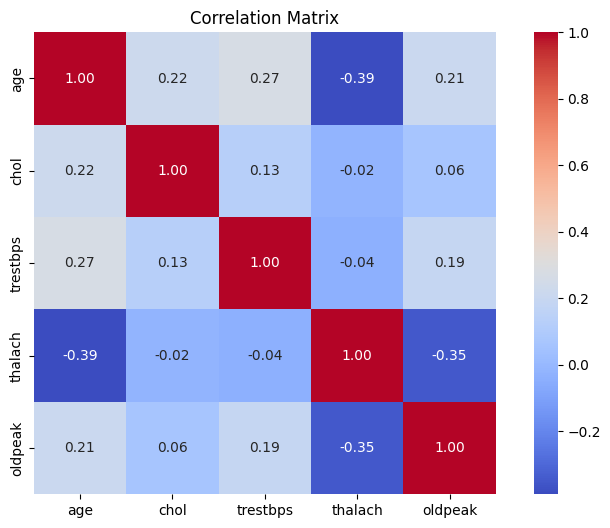

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = df.dropna()
columns = ['age', 'chol', 'trestbps', 'thalach', 'oldpeak']

correlation_results = {}
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        col1 = columns[i]
        col2 = columns[j]

        data_col1 = df[col1]
        data_col2 = df[col2]

        correlation_coefficient = np.corrcoef(data_col1, data_col2)[0, 1]
        correlation_results[(col1, col2)] = correlation_coefficient
        print(f"Correlation coefficient between {col1} and {col2}: {correlation_coefficient:.2f}")
# Visualization of the correlation matrix
plt.figure(figsize=(10, 6))
correlation_matrix = df[columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


Our analysis focused on identifying the strength of relationships between several key cardiovascular indicators within the dataset. Below is a brief summary of each correlation:

**Age and Cholesterol (Chol):** A correlation of 0.22 suggests a mild positive association, indicating that cholesterol levels tend to slightly increase with age.

**Age and Resting Blood Pressure (Trestbps):** The correlation of 0.27 shows a mild positive relationship, implying that as people age, their resting blood pressure may moderately increase.

**Age and Maximum Heart Rate (Thalach):** A stronger negative correlation of -0.39 indicates that maximum heart rate decreases as age increases.

**Age and ST Depression (Oldpeak):** With a correlation of 0.21, there is a mild positive relationship suggesting that ST depression during exercise slightly increases with age.

**Cholesterol and ST Depression (Oldpeak):** The correlation of 0.06 is very weak, indicating a negligible direct relationship between cholesterol levels and ST depression from exercise.

**Resting Blood Pressure (Trestbps) and ST Depression (Oldpeak):** A correlation of 0.19 points to a weak positive relationship, suggesting a slight increase in exercise-induced ST depression with higher resting blood pressure.

**Maximum Heart Rate (Thalach) and ST Depression (Oldpeak):** The negative correlation of -0.35 indicates a moderate inverse relationship, where higher maximum heart rates during exercise are associated with lower levels of ST depression.

These findings help us better understand how different cardiovascular factors are interrelated, which is crucial for assessing heart health risks and tailoring interventions accordingly.

We visualized these relationships using a heatmap, which helps us see the strength of these correlations at a glance, with **red** indicating stronger positive relationships and **blue** indicating stronger negative ones.



**Chi Squeare:**

In [ ]:


# Define the categorical columns from your dataset
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Loop through the columns and perform the Chi-Squared test
for column in categorical_columns:
    print(f"\nChi-Square Test for {column} and Heart Attack Risk (target):")

    # Create contingency table for the column and target
    contingency_table = pd.crosstab(df[column], df['target'])

    # Display the contingency table
    print("Contingency Table:")
    print(contingency_table)

    # Perform Chi-Squared test
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

    # Display the test results
    print(f"Chi-Square Statistic: {chi2_stat}")
    print(f"P-Value: {p_value}")
    print(f"Degrees of Freedom: {dof}")
    print("Expected Frequencies:")
    print(expected)


Chi-Square Test for sex and Heart Attack Risk (target):
Contingency Table:
target    0    1
sex             
0        86  226
1       413  300
Chi-Square Statistic: 78.86305133922973
P-Value: 6.656820681726434e-19
Degrees of Freedom: 1
Expected Frequencies:
[[151.89073171 160.10926829]
 [347.10926829 365.89073171]]

Chi-Square Test for cp and Heart Attack Risk (target):
Contingency Table:
target    0    1
cp              
0       375  122
1        33  134
2        65  219
3        26   51
Chi-Square Statistic: 280.98224857035257
P-Value: 1.2980664694820452e-60
Degrees of Freedom: 3
Expected Frequencies:
[[241.95414634 255.04585366]
 [ 81.3004878   85.6995122 ]
 [138.2595122  145.7404878 ]
 [ 37.48585366  39.51414634]]

Chi-Square Test for fbs and Heart Attack Risk (target):
Contingency Table:
target    0    1
fbs             
0       417  455
1        82   71
Chi-Square Statistic: 1.5133794801852827
P-Value: 0.21862413102893974
Degrees of Freedom: 1
Expected Frequencies:
[[424.5151219

In [ ]:
correlation_matrix = df.corr(numeric_only=True)
correlation_threshold = 0.75
highly_correlated_pairs = np.where(np.abs(correlation_matrix) >= correlation_threshold)
numeric_attributes = list(df.select_dtypes(include='number').columns)

attributes_to_remove = set()

for i, j in zip(*highly_correlated_pairs):
    if i != j and numeric_attributes[i] not in attributes_to_remove and numeric_attributes[j] not in attributes_to_remove:
        attribute_i = numeric_attributes[i]
        attribute_j = numeric_attributes[j]
        attributes_to_remove.add(attribute_j)

df_filtered = df.drop(columns=attributes_to_remove)

print("\nOriginal DataFrame:")
print(df)

print("\nDataFrame after removing highly correlated attributes:")
print(df_filtered)


Original DataFrame:
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3 

### **Correlation-based Feature Selection:**


In [3]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

selector = SelectKBest(score_func=f_classif, k=2)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['exang', 'oldpeak'], dtype='object')


This research aims to determine which elements in a health dataset are most associated with predicting the probability of a heart attack. Improving the accuracy and interpretability of the model is essential for this purpose.

• Defining Features and Target: The dataset is first divided into features (all columns except the final one) and the target variable (the last column, which represents the risk of a heart attack).

• Feature Selection Process: The SelectKBest approach is applied using the ANOVA F-test (f_classif), which evaluates the features based on their statistical significance in relation to the target variable. In this case, we choose the top two features that have the highest impact on predicting heart attack risk.

• Results: The selected features are exang (exercise-induced angina) and oldpeak (ST depression induced by exercise relative to rest). This suggests that these characteristics have the most influence on heart attack risk in the dataset

### **Wrapper Methods**
### **Recursive Feature Elimination:**

In [4]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

model = LogisticRegression()

rfe = RFE(model, n_features_to_select=2)
X_new = rfe.fit_transform(X, y)


selected_features = [i for i, mask in enumerate(rfe.support_) if mask]
print("Selected Features:", selected_features)

Selected Features: [1, 8]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Note: The red box is a description, not an error!

This analysis aims to identify the most significant features in a health dataset for predicting heart attack risk, thereby improving the model’s accuracy and interpretability.

Defining Features and Target: The dataset is divided into independent features (all columns except the final one) and the target variable (the last column, which represents the risk of a heart attack).
Model Selection: Logistic Regression is used as the base estimator for the Recursive Feature Elimination (RFE) method, which is commonly applied in binary classification tasks like predicting heart attack risk.
Recursive Feature Elimination Process: The model is trained on the data, and the least important features are systematically removed until only the top two features remain.
Results:
The two most important selected features are:

sex (Gender), which corresponds to column index 1.
thalach (Maximum Heart Rate Achieved), which corresponds to column index 8.
This indicates that these two features (sex and thalach) have the most significant influence on determining heart attack risk based on this analytical model

### **Embedded Methods**
### **L1 Regularization:**

In [5]:
# Assuming the last column is the target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Use L1 Regularization (LASSO) for feature selection
model = Lasso(alpha=0.1)
model.fit(X, y)


# Display the selected features (features with non-zero coefficients)
selected_features = X.columns[model.coef_ != 0]
print("Selected Features:", selected_features)

Selected Features: Index(['cp', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca'], dtype='object')



This analysis aims to identify the most important features in a health dataset for predicting the risk of a heart attack, helping to improve model accuracy and reduce computational complexity.  

 **Model Setup:**  
1. **Defining Features and Target:**  
    The dataset is divided so that **X** represents all features (all columns except the last one), while **y** represents the target variable (occurrence of a heart attack).  

2. **Applying Lasso:**  
    The **Lasso (Least Absolute Shrinkage and Selection Operator) model** is used, which is a form of L1 regularization that reduces the impact of less important features by assigning their weights to zero.

    The **regularization parameter (alpha = 0.1)** is set, which controls the amount of shrinkage applied to the coefficients.  



 **Feature Selection:**  

After training the model on the dataset, the coefficients associated with each feature are examined. Features that retain non-zero coefficients are considered the most significant.  

 **Results:**  

According to the Lasso analysis, the most influential features for predicting heart attack risk are:  
**['cp', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']**  
This indicates that these features play a key role in determining heart attack risk based on the available data.

### **Save the dataset after preprocessing :**


In [6]:
df.to_csv("The_Processed_data.csv")